In [7]:
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
df = pd.read_csv("data/vehicles_dataset_upd2.csv")
df.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,clean,other,https://images.craigslist.org/00F0F_5UAXmOzC18...,Carvana is the safer way to buy a car During t...,tn,35.970000,-83.940000,2021-04-08T15:10:56-0400,medium,2021-04-08 19:10:56+00:00


In [9]:
df.odometer.describe().apply(lambda x: f"{x:0.3f}")

count      9619.000
mean      95166.429
std       62746.525
min           0.000
25%       40784.000
50%       91000.000
75%      138594.500
max      283995.000
Name: odometer, dtype: object

In [10]:
df.apply(lambda x: x.odometer ** 2 if x.odometer % 2 == 0 else 0, axis=1)

0         753063364
1                 0
2         197346304
3                 0
4                 0
           ...     
9614    22500000000
9615              0
9616    22555233856
9617              0
9618              0
Length: 9619, dtype: int64

In [11]:
df['odometer_km'] = df.apply(lambda x: x.odometer  * 1.609344, axis=1)

In [12]:
df["odometer_km"]

0        44163.618048
1        96597.654912
2        22608.064512
3       188761.567104
4       129495.864960
            ...      
9614    241401.600000
9615    182778.026112
9616    241697.719296
9617     99687.595392
9618     57809.245824
Name: odometer_km, Length: 9619, dtype: float64

In [13]:
df["odometer"].corr(df["odometer_km"]) # это несильно хорошо, так как идеальная линейная зависимость и признак лишний

1.0

In [14]:
df["odometer/price"] = df.apply(lambda x: x.odometer / x.price, axis=1)

In [15]:
df["odometer/price"].corr(df["odometer"]) # использовать нежелательно -> переобучение

0.5183457884864099

In [16]:
df["odometer/price"].corr(df["price"]) # использовать нежелательно -> переобучение

-0.49196087424528717

### Генерация строковых фичей

In [17]:
df.region_url

0        https://chattanooga.craigslist.org
1          https://newjersey.craigslist.org
2               https://reno.craigslist.org
3       https://fayetteville.craigslist.org
4          https://knoxville.craigslist.org
                       ...                 
9614      https://chautauqua.craigslist.org
9615      https://binghamton.craigslist.org
9616           https://salem.craigslist.org
9617         https://madison.craigslist.org
9618         https://norfolk.craigslist.org
Name: region_url, Length: 9619, dtype: object

In [18]:
df.region_url.apply(lambda x: x.lower())

0        https://chattanooga.craigslist.org
1          https://newjersey.craigslist.org
2               https://reno.craigslist.org
3       https://fayetteville.craigslist.org
4          https://knoxville.craigslist.org
                       ...                 
9614      https://chautauqua.craigslist.org
9615      https://binghamton.craigslist.org
9616           https://salem.craigslist.org
9617         https://madison.craigslist.org
9618         https://norfolk.craigslist.org
Name: region_url, Length: 9619, dtype: object

In [19]:
df.region_url.str.lower().str.find('://')

0       5
1       5
2       5
3       5
4       5
       ..
9614    5
9615    5
9616    5
9617    5
9618    5
Name: region_url, Length: 9619, dtype: int64

In [20]:
%%time
df.region_url.str.lower().str.split("://").str[1].str.split(".").str[0]

CPU times: total: 78.1 ms
Wall time: 20 ms


0        chattanooga
1          newjersey
2               reno
3       fayetteville
4          knoxville
            ...     
9614      chautauqua
9615      binghamton
9616           salem
9617         madison
9618         norfolk
Name: region_url, Length: 9619, dtype: object

In [21]:
%%time
df.region_url.apply(lambda x: x.lower().split("://")[1].split(".")[0])

CPU times: total: 31.2 ms
Wall time: 4.98 ms


0        chattanooga
1          newjersey
2               reno
3       fayetteville
4          knoxville
            ...     
9614      chautauqua
9615      binghamton
9616           salem
9617         madison
9618         norfolk
Name: region_url, Length: 9619, dtype: object

In [22]:
df["region_new"] = df.region_url.apply(lambda x: x.lower().split("://")[1].split(".")[0])
df["region_new"]

0        chattanooga
1          newjersey
2               reno
3       fayetteville
4          knoxville
            ...     
9614      chautauqua
9615      binghamton
9616           salem
9617         madison
9618         norfolk
Name: region_new, Length: 9619, dtype: object

In [23]:
df["region"]

0                   chattanooga
1                  north jersey
2                  reno / tahoe
3                  fayetteville
4                     knoxville
                 ...           
9614                 chautauqua
9615                 binghamton
9616                      salem
9617                    madison
9618    norfolk / hampton roads
Name: region, Length: 9619, dtype: object

In [24]:
df[df["region"] == df['region_new']].region.unique()

array(['chattanooga', 'fayetteville', 'knoxville', 'roanoke',
       'cincinnati', 'jacksonville', 'redding', 'salina', 'billings',
       'charleston', 'modesto', 'phoenix', 'charlotte', 'eugene',
       'syracuse', 'stockton', 'danville', 'philadelphia', 'maine',
       'springfield', 'richmond', 'albuquerque', 'yakima', 'boise',
       'albany', 'nashville', 'cleveland', 'prescott', 'holland', 'ocala',
       'pittsburgh', 'tucson', 'ames', 'erie', 'vermont', 'austin',
       'bellingham', 'chautauqua', 'louisville', 'indianapolis',
       'baltimore', 'salem', 'mankato', 'montgomery', 'chico', 'tulsa',
       'harrisburg', 'chicago', 'kalispell', 'columbus', 'binghamton',
       'greensboro', 'denver', 'delaware', 'rockford', 'lancaster',
       'orlando', 'hartford', 'charlottesville', 'ithaca', 'memphis',
       'elko', 'clarksville', 'lincoln', 'gainesville', 'wenatchee',
       'wilmington', 'mobile', 'topeka', 'rochester', 'bakersfield',
       'kalamazoo', 'reading', 'toledo'

In [25]:
df['region_corrected'] = df.region.apply(lambda x: x.lower().split("/")[0].replace(" ", ""). replace("-", ""))
df['region_corrected']

0        chattanooga
1        northjersey
2               reno
3       fayetteville
4          knoxville
            ...     
9614      chautauqua
9615      binghamton
9616           salem
9617         madison
9618         norfolk
Name: region_corrected, Length: 9619, dtype: object

In [26]:
df[df["region_corrected"] == df["region_new"]].region.nunique()

283

In [27]:
df["manufacturer_model"] = df["manufacturer"] + ": " + df.model
df["manufacturer_model"]

0           ram: 2500 crew cab big horn
1            ford: explorer 4wd 4dr xlt
2          volkswagen: golf r hatchback
3                          toyota: rav4
4           bmw: 1 series 128i coupe 2d
                     ...               
9614                       toyota: rav4
9615                     jeep: wrangler
9616    audi: a3 2.0t premium plus pzev
9617                   porsche: cayenne
9618        ram: 1500 crew cab big horn
Name: manufacturer_model, Length: 9619, dtype: object

In [28]:
df["manufacturer_model"] = df.apply(lambda x: ": ".join([x.manufacturer, x.model]), axis=1)
df["manufacturer_model"]

0           ram: 2500 crew cab big horn
1            ford: explorer 4wd 4dr xlt
2          volkswagen: golf r hatchback
3                          toyota: rav4
4           bmw: 1 series 128i coupe 2d
                     ...               
9614                       toyota: rav4
9615                     jeep: wrangler
9616    audi: a3 2.0t premium plus pzev
9617                   porsche: cayenne
9618        ram: 1500 crew cab big horn
Name: manufacturer_model, Length: 9619, dtype: object

In [29]:
df.description

0       Carvana is the safer way to buy a car During t...
1       ***Call Us for more information at: 201-635-14...
2       Carvana is the safer way to buy a car During t...
3       2013 Toyota RAV4 XLE 4dr SUV     Offered by: R...
4       Carvana is the safer way to buy a car During t...
                              ...                        
9614    Transmission:Automatic Exterior Color:WHITE In...
9615    2008 Jeep Wrangler X  Offered by: R&L Auto -- ...
9616    2011 Audi A3 2.0T Premium Plus PZEV Wagon2011 ...
9617    2015 Porsche Cayenne AWD 4dr S E-Hybrid - $31,...
9618    Carvana is the safer way to buy a car During t...
Name: description, Length: 9619, dtype: object

In [30]:
df['desc_len'] = df.apply(lambda x: len(x.description), axis=1)
df["desc_len"]

0       4482
1        968
2       4286
3       3241
4       4851
        ... 
9614    1710
9615     948
9616     909
9617    3644
9618    4483
Name: desc_len, Length: 9619, dtype: int64

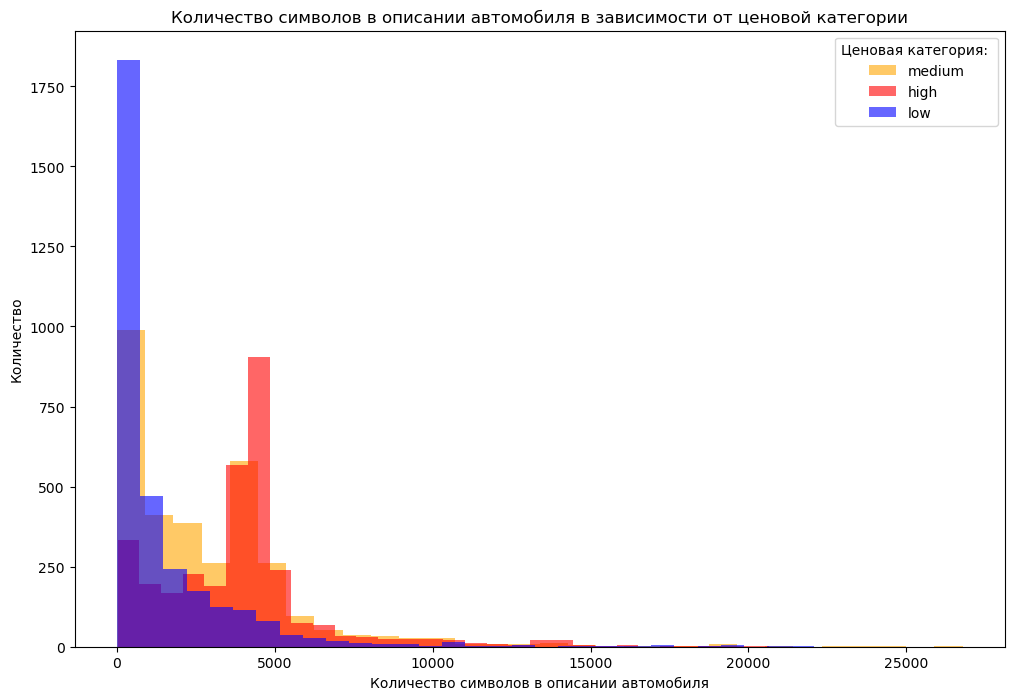

In [31]:

colors = {'medium': "orange", "high": "red", "low": "blue"}

fig, ax = plt.subplots(figsize=(12, 8))

for price_category in colors:
    color = colors[price_category]
    data = df[df["price_category"] == price_category]
    
    ax.hist(data["desc_len"], color=color, alpha=0.6, bins=30)
    
plt.ylabel("Количество")
plt.xlabel("Количество символов в описании автомобиля")
plt.title("Количество символов в описании автомобиля в зависимости от ценовой категории")
plt.legend(colors, title="Ценовая категория: ")

In [32]:
df['model_in_desc'] = df.apply(lambda x: x.description.count(x.model), axis=1)
df["model_in_desc"]

0       0
1       0
2       0
3       0
4       0
       ..
9614    0
9615    0
9616    0
9617    0
9618    0
Name: model_in_desc, Length: 9619, dtype: int64

In [33]:
df["model_in_desc"].value_counts()

model_in_desc
0     8502
1      790
2      101
3       49
5       31
4       23
9       14
8        9
7        9
6        9
28       9
16       8
18       6
15       5
20       5
14       5
17       4
25       3
31       3
23       3
27       3
11       3
22       3
13       3
19       3
29       2
10       2
35       2
26       1
63       1
54       1
36       1
34       1
49       1
30       1
56       1
32       1
12       1
Name: count, dtype: int64

### Категориальные данные

One-Hot-кодирование — это представление категориальных переменных в виде двоичных векторов.

In [34]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,posting_date,price_category,date,odometer_km,odometer/price,region_new,region_corrected,manufacturer_model,desc_len,model_in_desc
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00,44163.618048,0.499036,chattanooga,chattanooga,ram: 2500 crew cab big horn,4482,0
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00,96597.654912,3.542852,newjersey,northjersey,ford: explorer 4wd 4dr xlt,968,0
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00,22608.064512,0.394718,reno,reno,volkswagen: golf r hatchback,4286,0
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00,188761.567104,8.089034,fayetteville,fayetteville,toyota: rav4,3241,0
4,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,...,2021-04-08T15:10:56-0400,medium,2021-04-08 19:10:56+00:00,129495.864960,5.515079,knoxville,knoxville,bmw: 1 series 128i coupe 2d,4851,0


In [39]:
ohe = OneHotEncoder(sparse=False) # False чтобы лушче видно было, не разряжено
ohe

OneHotEncoder(sparse=False)

In [43]:
df.fuel.unique()

array(['diesel', 'other', 'gas', 'electric', 'hybrid'], dtype=object)

In [44]:
ohe.fit(df[["fuel"]])

c:\Users\lorex\anaconda3\envs\DataScience\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\lorex\anaconda3\envs\DataScience\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\lorex\anaconda3\envs\DataScience\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


OneHotEncoder(sparse=False, sparse_output=False)

In [45]:
ohe_fuel = ohe.transform(df[["fuel"]])


c:\Users\lorex\anaconda3\envs\DataScience\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\lorex\anaconda3\envs\DataScience\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [48]:
ohe_fuel.shape

(9619, 5)

In [50]:
ohe.categories_

[array(['diesel', 'electric', 'gas', 'hybrid', 'other'], dtype=object)]

In [54]:
ohe.inverse_transform(ohe_fuel)

array([['diesel'],
       ['other'],
       ['gas'],
       ...,
       ['gas'],
       ['hybrid'],
       ['gas']], dtype=object)

In [57]:
ohe.get_feature_names_out()

array(['fuel_diesel', 'fuel_electric', 'fuel_gas', 'fuel_hybrid',
       'fuel_other'], dtype=object)

In [61]:
df[ohe.get_feature_names_out()] = ohe_fuel
df.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,region_new,region_corrected,manufacturer_model,desc_len,model_in_desc,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,chattanooga,chattanooga,ram: 2500 crew cab big horn,4482,0,1.0,0.0,0.0,0.0,0.0
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,newjersey,northjersey,ford: explorer 4wd 4dr xlt,968,0,0.0,0.0,0.0,0.0,1.0
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,reno,reno,volkswagen: golf r hatchback,4286,0,0.0,0.0,1.0,0.0,0.0
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,fayetteville,fayetteville,toyota: rav4,3241,0,0.0,0.0,1.0,0.0,0.0
4,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,...,knoxville,knoxville,bmw: 1 series 128i coupe 2d,4851,0,0.0,0.0,0.0,0.0,1.0


### Нормализация данных

Нормализация — это адаптация входных данных к заданному диапазону (обычно к [0…1] или [-1…1]).

Цели нормализации данных:
1. сравнить признаки между собой;
2. привести данные к нормальному распределению.

Стандартизация, или  Z-масштабирование — это преобразование данных на основе среднего значения (‌ $\mu$ ) и стандартного отклонения (‌ $\sigma $ ). $$x_{std} = \frac{x - \mu}{\sigma}$$

In [63]:
from sklearn.preprocessing import StandardScaler

In [66]:
std_scaler = StandardScaler()
std_scaler.fit(df[['odometer', 'price']])

c:\Users\lorex\anaconda3\envs\DataScience\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\lorex\anaconda3\envs\DataScience\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\lorex\anaconda3\envs\DataScience\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


StandardScaler()

In [67]:
print(f"Std: {std_scaler.mean_}")
print(f"Dispersion: {std_scaler.var_}")


Std: [95166.42894272 18014.65277056]
Dispersion: [3.93671714e+09 1.56199217e+08]


In [69]:
std_scaled = std_scaler.transform(df[['odometer', 'price']])
std_scaled

c:\Users\lorex\anaconda3\envs\DataScience\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\lorex\anaconda3\envs\DataScience\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\lorex\anaconda3\envs\DataScience\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array([[-1.07938964,  2.95850859],
       [-0.56011477, -0.08582617],
       [-1.29286276,  1.40625632],
       ...,
       [ 0.87686817, -0.72168951],
       [-0.52951388,  1.11100834],
       [-0.94425163,  1.11820951]])

In [71]:
df[['std_scaled_odometer', 'std_scaled_price']] = std_scaled
df.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,manufacturer_model,desc_len,model_in_desc,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,std_scaled_odometer,std_scaled_price
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,ram: 2500 crew cab big horn,4482,0,1.0,0.0,0.0,0.0,0.0,-1.079390,2.958509
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,ford: explorer 4wd 4dr xlt,968,0,0.0,0.0,0.0,0.0,1.0,-0.560115,-0.085826
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,volkswagen: golf r hatchback,4286,0,0.0,0.0,1.0,0.0,0.0,-1.292863,1.406256
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,toyota: rav4,3241,0,0.0,0.0,1.0,0.0,0.0,0.352621,-0.281218
4,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,...,bmw: 1 series 128i coupe 2d,4851,0,0.0,0.0,0.0,0.0,1.0,-0.234311,-0.274017


Text(0.5, 0, 'Стоимось автомобиля')

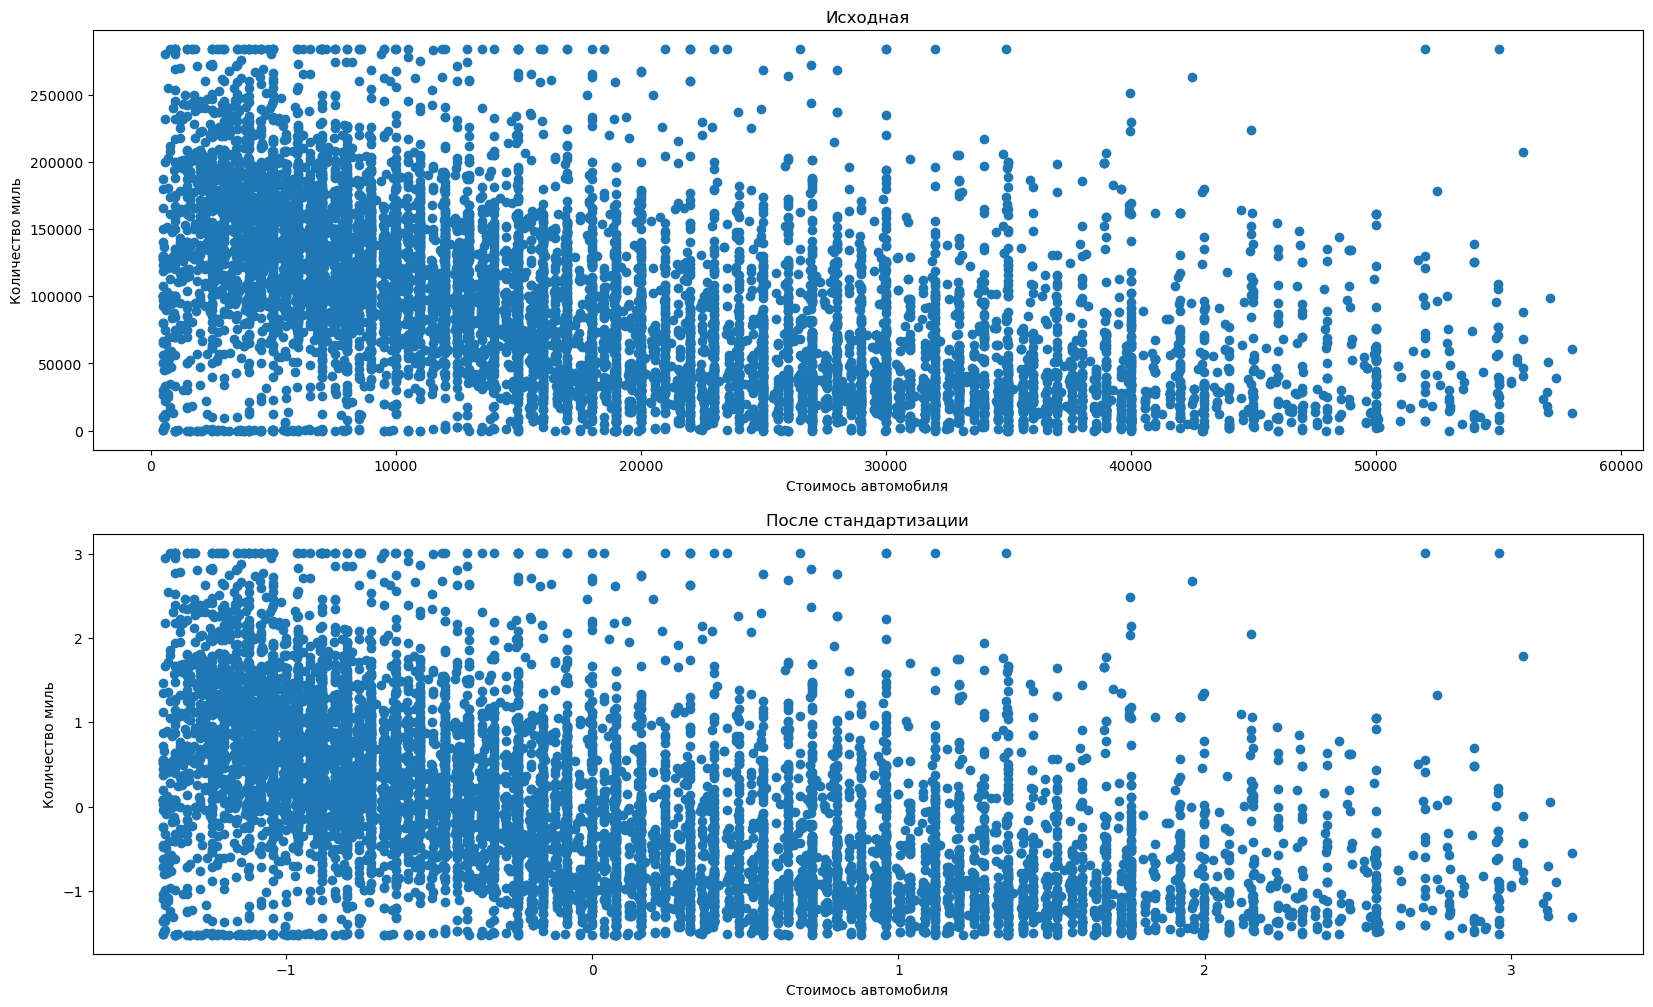

In [75]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 12))

ax1.scatter(df.price, df.odometer)
ax1.set_title("Исходная")
ax1.set_ylabel("Количество миль")
ax1.set_xlabel("Стоимось автомобиля")

ax2.scatter(df.std_scaled_price, df.std_scaled_odometer)
ax2.set_title("После стандартизации")
ax2.set_ylabel("Количество миль")
ax2.set_xlabel("Стоимось автомобиля")


In [76]:
std_scaler.transform([[50000, 30000]])

c:\Users\lorex\anaconda3\envs\DataScience\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.71986101,  0.95898363]])